#Hi, 

I know my portfolio is not entirely complete, but I have struggled a bit with it and have had quite a few errors along the way. I haven't had the time to get deeper into Datacamp, but I am sure that it would have helped me with the portfolio.
I want to thank you all for an excellent course that has been an eyeopener, and I am sure that I can use some part of it in my project. 

Regards Camilla 

# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* "supervised machine learning with penguins".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# You solutions from here...


In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv('https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv')
penguins

species_short     island  ...  body_mass_g     sex
0          Adelie  Torgersen  ...       3750.0    MALE
1          Adelie  Torgersen  ...       3800.0  FEMALE
2          Adelie  Torgersen  ...       3250.0  FEMALE
3          Adelie  Torgersen  ...          NaN     NaN
4          Adelie  Torgersen  ...       3450.0  FEMALE
..            ...        ...  ...          ...     ...
339        Gentoo     Biscoe  ...          NaN     NaN
340        Gentoo     Biscoe  ...       4850.0  FEMALE
341        Gentoo     Biscoe  ...       5750.0    MALE
342        Gentoo     Biscoe  ...       5200.0  FEMALE
343        Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.head()

species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...       3750.0    MALE
1        Adelie  Torgersen  ...       3800.0  FEMALE
2        Adelie  Torgersen  ...       3250.0  FEMALE
3        Adelie  Torgersen  ...          NaN     NaN
4        Adelie  Torgersen  ...       3450.0  FEMALE

[5 rows x 7 columns]

In [ ]:
penguins.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

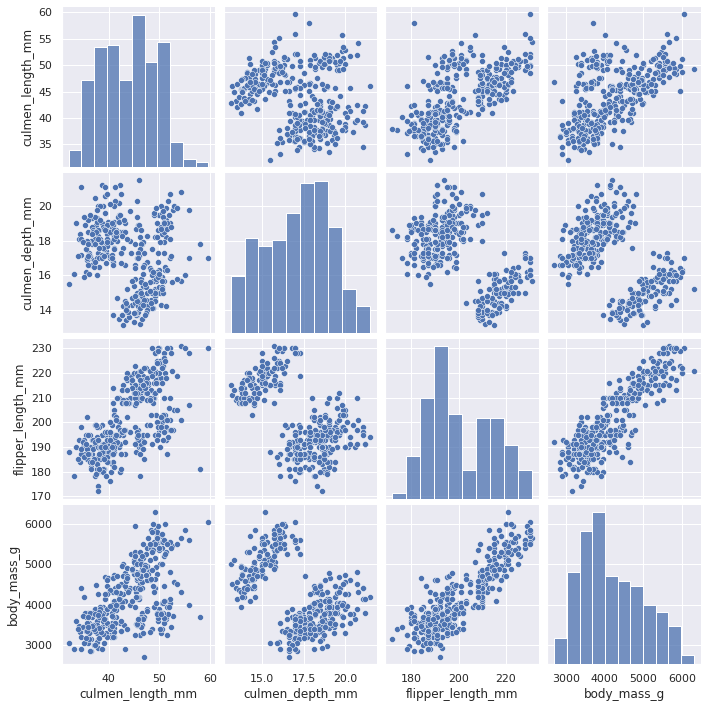

In [ ]:
sns.pairplot(penguins)

In [ ]:
penguins.corr()

culmen_length_mm  ...  body_mass_g
culmen_length_mm           1.000000  ...     0.595110
culmen_depth_mm           -0.235053  ...    -0.471916
flipper_length_mm          0.656181  ...     0.871202
body_mass_g                0.595110  ...     1.000000

[4 rows x 4 columns]

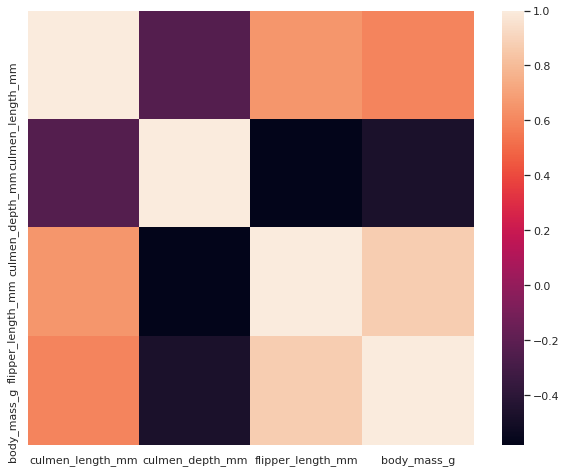

In [ ]:
# And lastly, a correlation plot
sns.heatmap(penguins.corr())

### Preprocessing


In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
penguins.set_index('species_short', 'islsnd', 'sex', inplace=True)
penguins

island  culmen_length_mm  ...  body_mass_g     sex
    species_short                               ...                     
0   Adelie         Torgersen              39.1  ...       3750.0    MALE
1   Adelie         Torgersen              39.5  ...       3800.0  FEMALE
2   Adelie         Torgersen              40.3  ...       3250.0  FEMALE
3   Adelie         Torgersen               NaN  ...          NaN     NaN
4   Adelie         Torgersen              36.7  ...       3450.0  FEMALE
...                      ...               ...  ...          ...     ...
339 Gentoo            Biscoe               NaN  ...          NaN     NaN
340 Gentoo            Biscoe              46.8  ...       4850.0  FEMALE
341 Gentoo            Biscoe              50.4  ...       5750.0    MALE
342 Gentoo            Biscoe              45.2  ...       5200.0  FEMALE
343 Gentoo            Biscoe              49.9  ...       5400.0    MALE

[344 rows x 6 columns]

In [ ]:
penguins.head(5)

island  culmen_length_mm  ...  body_mass_g     sex
  species_short                               ...                     
0 Adelie         Torgersen              39.1  ...       3750.0    MALE
1 Adelie         Torgersen              39.5  ...       3800.0  FEMALE
2 Adelie         Torgersen              40.3  ...       3250.0  FEMALE
3 Adelie         Torgersen               NaN  ...          NaN     NaN
4 Adelie         Torgersen              36.7  ...       3450.0  FEMALE

[5 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler=StandardScaler(penguins)
penguins_scaled = scaler.fit_transform(penguins)


NameError: ignored

In [ ]:
# What are mean and Sd now?
pd.DataFrame(penguins_scaled, columns=penguins.columns).describe()

NameError: ignored

### Executingh PCA


In [ ]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [ ]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fitr the model
model.fit(penguins_scaled)

NameError: ignored

In [ ]:
# Fit and transform the data
penguins_reduced = model.transform(penguins_scaled)
penguins_reduced

NameError: ignored

In [ ]:
plot_penguins = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
# Your solutions from here...

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
# load the dataset from GitHub - original source

datasets = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv')


In [ ]:
datasets.head()

v7  v9 v10  v14 v56 v57 v58 v59  ... v263 v264 v265 v266 v267 v268 v269 bald
0   2   1   1    1   1   1   1   2  ...    2    1    4    4    3    2    2   48
1   1   1   2    0   1   1   2   2  ...    2    2    2    1    2    2    1   30
2   1   1   2    0   1   1   1   1  ...    2    1    2    2    2    1    1   57
3   2   1   1    1   .   1   1   2  ...    2    2    4    3    3    3    2   55
4   1   1   2    0   1   1   2   1  ...    4    4    4    3    3    2    4   27

[5 rows x 91 columns]

In [ ]:
datasets.groupby(["v7", "v107"]).mean()

v9       v14       bald
v7 v107                               
1  .     1.333333  2.333333  65.333333
   1     1.314815  1.407407  43.129630
   2     1.305344  1.623410  46.417303
2  .     1.000000  2.000000  57.000000
   1     1.190000  1.680000  43.310000
   2     1.303828  1.760766  46.153110

In [ ]:
X = datasets[['v9', 'v14']]
X_1 = datasets[['v9', 'v14' ]]
linked = linkage(X, 'ward')

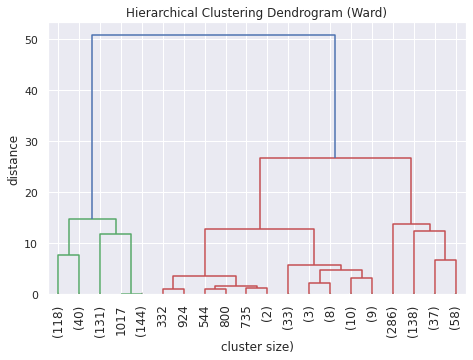

In [ ]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    datasets['cluster'+k]=labels

Cluster count- 2 |  db score- 0.67 |  ch score -  1487.83 |  ss score -  0.59
Cluster count- 3 |  db score- 0.66 |  ch score -  1595.17 |  ss score -  0.6
Cluster count- 4 |  db score- 0.77 |  ch score -  1424.09 |  ss score -  0.56
Cluster count- 5 |  db score- 0.82 |  ch score -  1448.8 |  ss score -  0.64
Cluster count- 6 |  db score- 0.75 |  ch score -  1621.92 |  ss score -  0.65
Cluster count- 7 |  db score- 0.6 |  ch score -  2062.3 |  ss score -  0.75
Cluster count- 8 |  db score- 0.46 |  ch score -  3135.65 |  ss score -  0.86
Cluster count- 9 |  db score- 0.39 |  ch score -  4036.16 |  ss score -  0.92
Cluster count- 10 |  db score- 0.32 |  ch score -  5501.41 |  ss score -  0.96


In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
datasets['cluster']=labels

In [ ]:
for i in range(2,6):
    i=str(i)
    X_1=datasets[['cluster'+i,'v9', 'v14']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("") 
    count=datasets.groupby(['cluster'+i])['id'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()



... and the results for 2 clusters are!
cluster2     0     1
v9        1.20  1.43
v14       2.62  0.36



KeyError: ignored

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
penguins

species_short     island  ...  body_mass_g     sex
0          Adelie  Torgersen  ...       3750.0    MALE
1          Adelie  Torgersen  ...       3800.0  FEMALE
2          Adelie  Torgersen  ...       3250.0  FEMALE
3          Adelie  Torgersen  ...          NaN     NaN
4          Adelie  Torgersen  ...       3450.0  FEMALE
..            ...        ...  ...          ...     ...
339        Gentoo     Biscoe  ...          NaN     NaN
340        Gentoo     Biscoe  ...       4850.0  FEMALE
341        Gentoo     Biscoe  ...       5750.0    MALE
342        Gentoo     Biscoe  ...       5200.0  FEMALE
343        Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
X.describe()

v9          v14
count  1023.000000  1023.000000
mean      1.294233     1.664712
std       0.455920     1.384848
min       1.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     2.000000
75%       2.000000     2.000000
max       2.000000    10.000000

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = data.loc['v9':'v14']

NameError: ignored

In [ ]:
# Define the dependant variabel / target to predict (world region)
y = penguins

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

ValueError: ignored

In [ ]:
# You solutions from here...

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

ValueError: ignored

---

# Portfolio assignments for Wednesday

**Requirement:**

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 14.8MB 263kB/s 
     |████████████████████████████████| 6.5MB 26.8MB/s 
     |████████████████████████████████| 18.3MB 1.3MB/s 
     |████████████████████████████████| 1.6MB 4.1MB/s 


In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-10 09:11:20--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-10 09:11:20--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

2020

# Your solutions from here...


In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-09 21:34:25--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-09 21:34:25--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip.1’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

20

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

In [ ]:
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

In [ ]:
print(municipalities.columns)

In [ ]:
municipalities.plot()

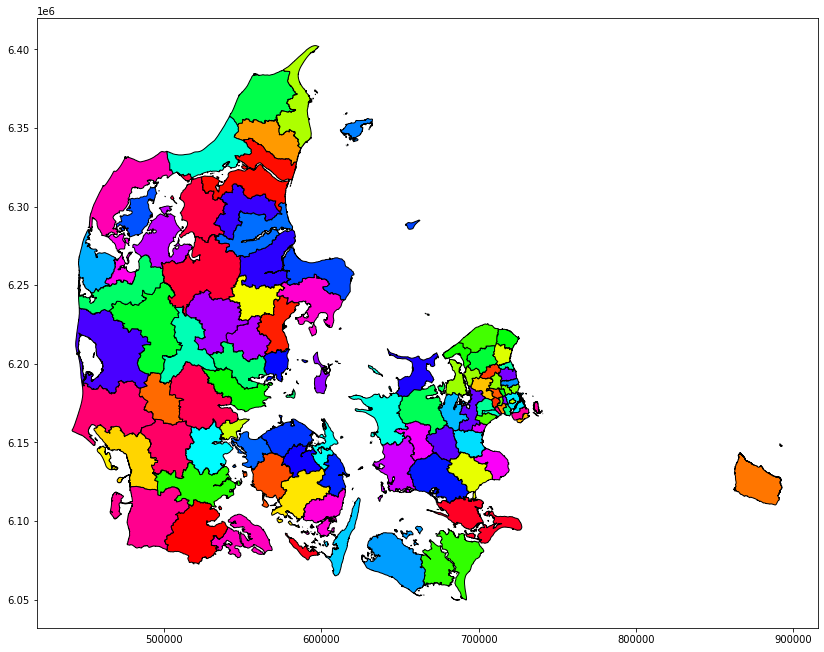

In [ ]:
municipalities.plot(cmap='hsv', edgecolor='black', column='KOMNAVN', figsize=(14,14))

In [ ]:
mun = municipalities.dissolve(by='KOMNAVN')
mun

geometry  ...  TIMEOF_EXP
KOMNAVN                                                             ...            
Aabenraa         MULTIPOLYGON Z (((532611.300 6079233.260 -999....  ...  2020-11-07
Aalborg          MULTIPOLYGON Z (((577131.740 6306752.540 -999....  ...  2020-11-07
Aarhus           MULTIPOLYGON Z (((580132.510 6230146.780 -999....  ...  2020-11-07
Albertslund      POLYGON Z ((711377.280 6178342.550 -999.000, 7...  ...  2020-11-07
Allerød          POLYGON Z ((701094.650 6192181.200 -999.000, 7...  ...  2020-11-07
...                                                            ...  ...         ...
Vejle            MULTIPOLYGON Z (((546709.790 6164809.680 -999....  ...  2020-11-07
Vesthimmerlands  MULTIPOLYGON Z (((506960.190 6302780.280 -999....  ...  2020-11-07
Viborg           MULTIPOLYGON Z (((498863.330 6258837.540 -999....  ...  2020-11-07
Vordingborg      MULTIPOLYGON Z (((699975.330 6088090.090 -999....  ...  2020-11-07
Ærø              MULTIPOLYGON Z (((590462.130 6083953.640 -999....  ...  2020-11-07

[99 rows x 24 columns]

In [ ]:
municipalities['KOMKODE'] = municipalities[KOMKODE].astype('float')


NameError: ignored

In [ ]:
da

In [ ]:
mun.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 24 entries, geometry to TIMEOF_EXP
dtypes: float64(1), geometry(1), int64(3), object(19)
memory usage: 21.8+ KB


#more data


In [ ]:
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

omr  alt2016  psyk2016  psykratio
0      København    64735      1326   0.020484
1  Frederiksberg    12364       258   0.020867
2         Dragør     1746        54   0.030928
3         Tårnby     5614       158   0.028144
4    Albertslund     3686        76   0.020619

In [ ]:
mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_fun.head()

geometry  ...  psykratio
0  MULTIPOLYGON Z (((532611.300 6079233.260 -999....  ...   0.015536
1  MULTIPOLYGON Z (((577131.740 6306752.540 -999....  ...   0.018536
2  MULTIPOLYGON Z (((580132.510 6230146.780 -999....  ...   0.016495
3  POLYGON Z ((711377.280 6178342.550 -999.000, 7...  ...   0.020619
4  POLYGON Z ((701094.650 6192181.200 -999.000, 7...  ...   0.009304

[5 rows x 28 columns]

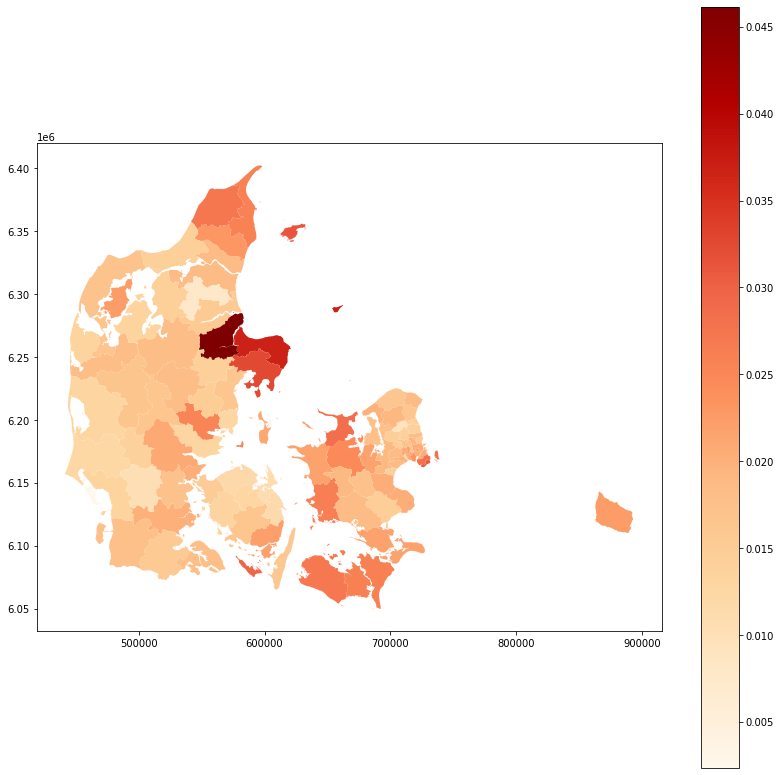

In [ ]:
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14), cmap='OrRd')

In [ ]:
stoejdata=gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")
stoejdata.head()


DATAEJER  VEJBESTYRE  ...  GNSHAST222                        geometry
0      316       316.0  ...        50.7  POINT (666785.000 6174847.000)
1      316       316.0  ...        61.0  POINT (650362.000 6165481.000)
2      316       316.0  ...        39.6  POINT (670888.000 6165624.000)
3      316       316.0  ...        74.1  POINT (675622.000 6167385.000)
4      316       316.0  ...        58.7  POINT (668085.000 6163679.000)

[5 rows x 36 columns]

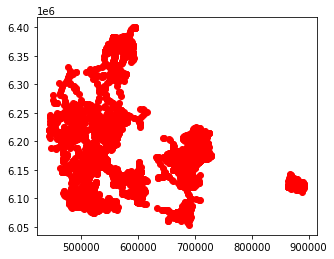

In [ ]:
stoejdata.plot(color="r")

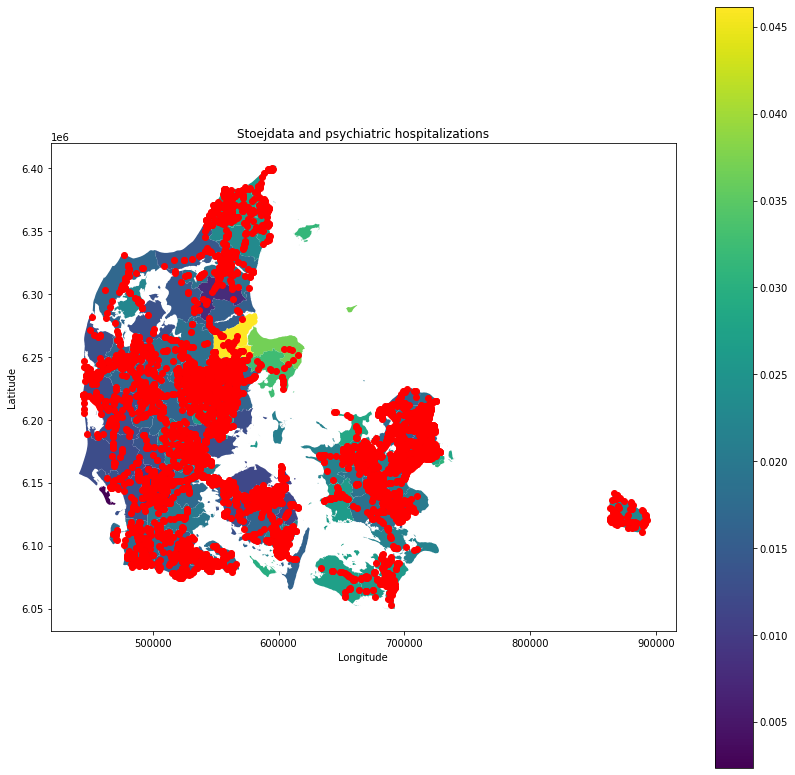

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
plt.title('Stoejdata and psychiatric hospitalizations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
mun_fun.plot(column="psykratio", ax=ax, legend=True, label='Ratio of pshychiatric hospitalizations')
stoejdata.plot(ax=ax, color="red", label="Route")

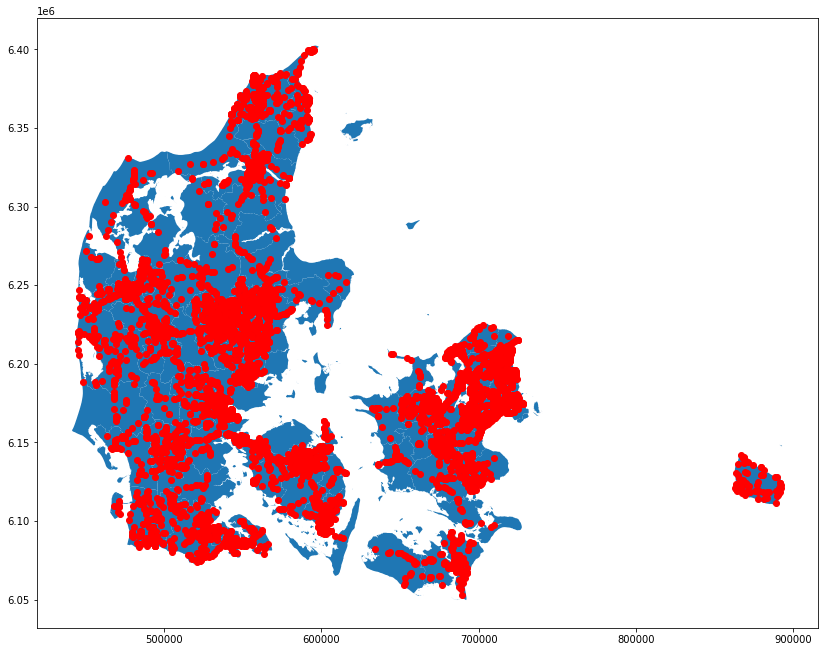

In [ ]:
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun_fun.plot(ax=ax)
stoejdata.plot(ax=ax, color="red")

In [ ]:
stoejdata_in_mun = gdp.sjoin(stoejdata, mun_fun, how="right", op='within')
stoejdata_in_mun.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:25832
Right CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...

  """Entry point for launching an IPython kernel.


index_left DATAEJER  VEJBESTYRE  ...  alt2016 psyk2016 psykratio
0      7277.0        0         0.0  ...   7016.0    109.0  0.015536
0      7580.0        0       580.0  ...   7016.0    109.0  0.015536
0       939.0      580       580.0  ...   7016.0    109.0  0.015536
0      7276.0        0         0.0  ...   7016.0    109.0  0.015536
0      3195.0      580       580.0  ...   7016.0    109.0  0.015536

[5 rows x 64 columns]

In [ ]:
print (stoejdata_in_mun.groupby('omr')['GNSHAST071'].nunique())

omr
Aabenraa            39
Aalborg            196
Aarhus              28
Albertslund         66
Allerød             63
                  ... 
Vejle              266
Vesthimmerlands      3
Viborg              21
Vordingborg          4
Ærø                  0
Name: GNSHAST071, Length: 98, dtype: int64


In [ ]:
print(stoejdata_in_mun.columns)

Index(['index_left', 'DATAEJER', 'VEJBESTYRE', 'VEJNR', 'VEJDEL', 'VEJNAVN',
       'KILOMETER', 'METER', 'LOKATION', 'KOMMUNE', 'AAR', 'AADT',
       'TIMEANTAL0', 'TIMEANTAL1', 'TIMEANTAL2', 'GNSHAST07_', 'GNSHAST19_',
       'GNSHAST22_', 'TIMEANTAL3', 'TIMEANTAL4', 'TIMEANTAL5', 'GNSHAST070',
       'GNSHAST190', 'GNSHAST220', 'TIMEANTAL6', 'TIMEANTAL7', 'TIMEANTAL8',
       'GNSHAST071', 'GNSHAST191', 'GNSHAST221', 'TIMEANTAL9', 'TIMEANTA10',
       'TIMEANTA11', 'GNSHAST072', 'GNSHAST192', 'GNSHAST222', 'geometry',
       'FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT',
       'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA',
       'GYLDIG_TIL', 'KOMKODE', 'DQ_SPECIFK', 'DQ_STATEM', 'DQ_DESCR',
       'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV', 'TIMEOF_CRE',
       'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP', 'omr', 'alt2016', 'psyk2016',
       'psykratio'],
      dtype='object')


In [ ]:
stoejdata_in_mun['numstoejdata'] = stoejdata_in_mun['GNSHAST071'].groupby(stoejdata_in_mun['omr']).transform('count')
stoejdata_in_mun

index_left DATAEJER  VEJBESTYRE  ...  psyk2016 psykratio numstoejdata
0       7277.0        0         0.0  ...     109.0  0.015536         49.0
0       7580.0        0       580.0  ...     109.0  0.015536         49.0
0        939.0      580       580.0  ...     109.0  0.015536         49.0
0       7276.0        0         0.0  ...     109.0  0.015536         49.0
0       3195.0      580       580.0  ...     109.0  0.015536         49.0
..         ...      ...         ...  ...       ...       ...          ...
97      7340.0        0         0.0  ...     137.0  0.021840         10.0
97      7338.0        0         0.0  ...     137.0  0.021840         10.0
97      7655.0        0         0.0  ...     137.0  0.021840         10.0
97      7339.0        0         0.0  ...     137.0  0.021840         10.0
98         NaN      NaN         NaN  ...      20.0  0.029630          0.0

[7754 rows x 65 columns]

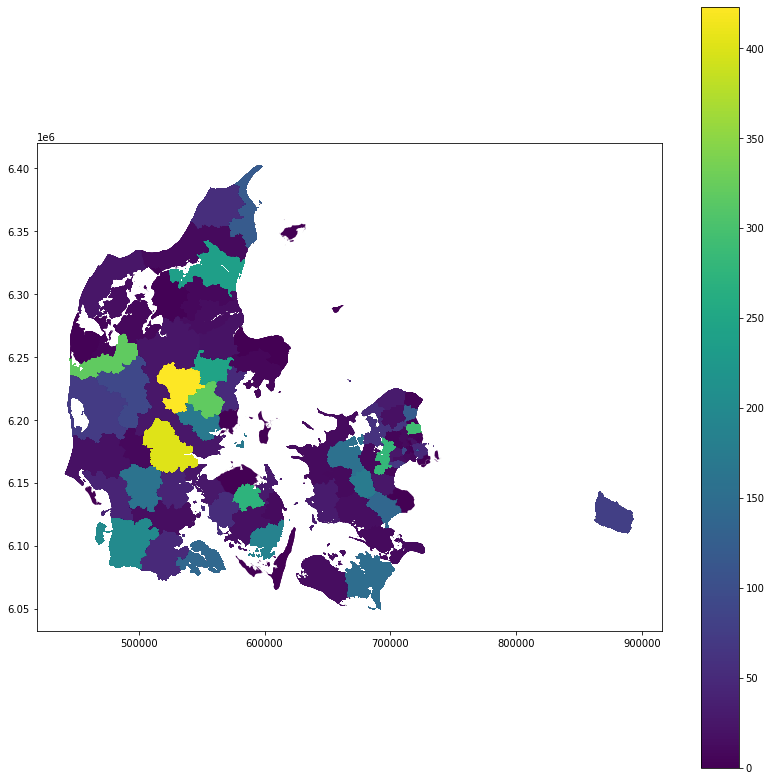

In [ ]:
stoejdata_in_mun.plot(column="numstoejdata", legend="True", figsize=(14,14))

In [ ]:
mun = mun.to_crs(epsg=3857)

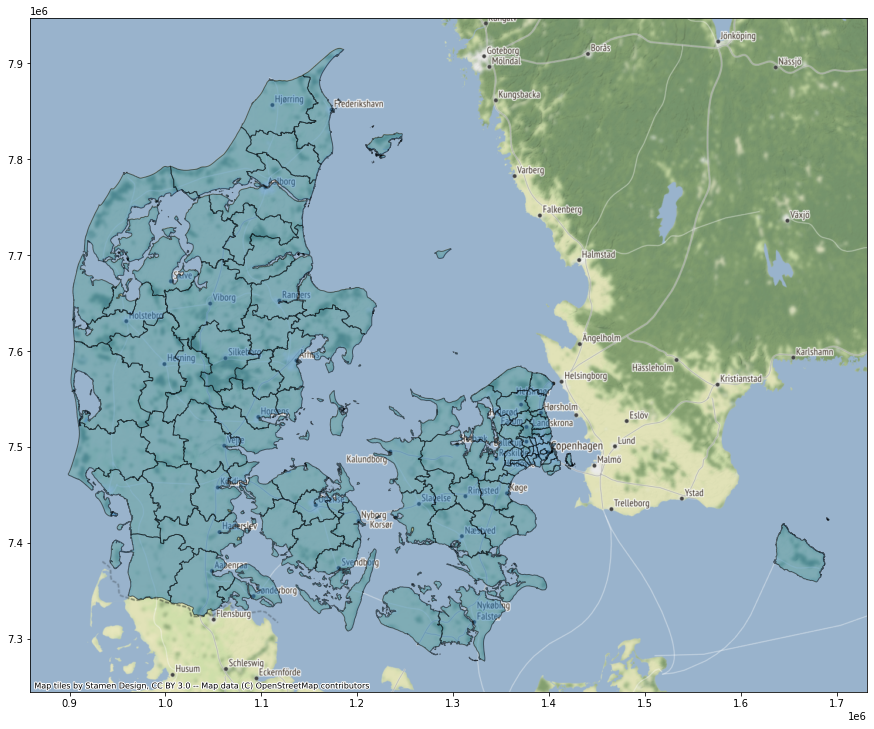

In [ ]:
ax = mun.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [ ]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

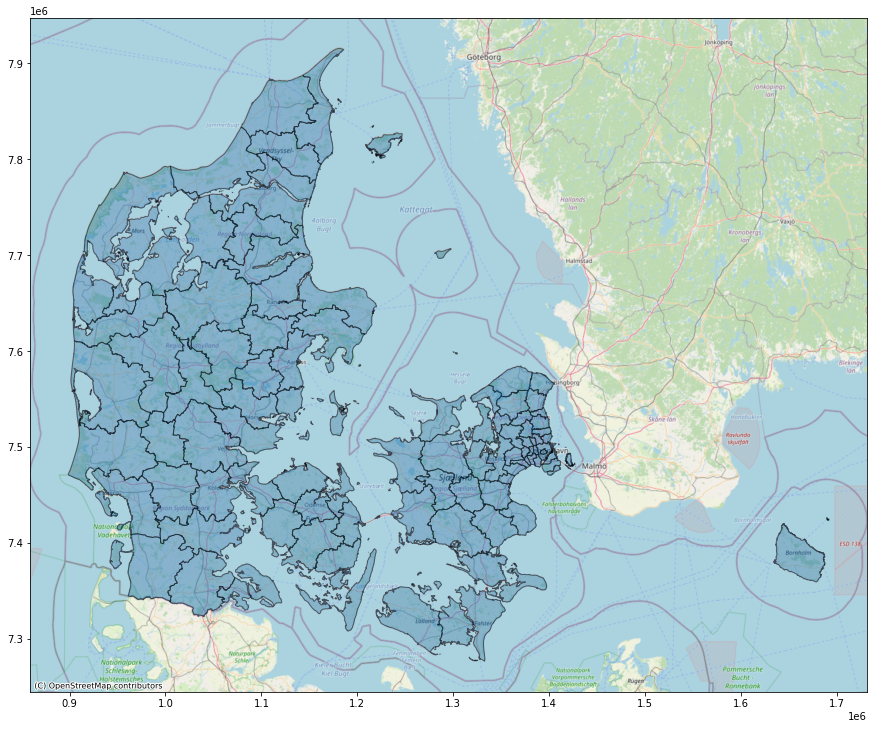

In [ ]:
ax = mun.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

**bold text**## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

*italicized text*### Data preperation

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 8.9MB 3.9MB/s 
     |████████████████████████████████| 2.2MB 45.5MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296309 sha256=04bc1346f67a259037ac00de7ba51f214653d5b7fd99e9386feeb54e0534cea2
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
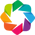

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).


In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

Calculate dimensional centralities
There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.


In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126



In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653237

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.03651083062621187

Reciprocity
Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between i,j makes an edge between j,i more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

# Your solutions here...

## Portfolio assignments for Thursday

**Requirement:**

Portfolio assignments for Thursday
Requirement:

Trump vs. GPT-2
SDS 2020 - Module 3: Individual Assignment
The site https://faketrump.ai/ WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

We built an artificial intelligence model by fine-tuning GPT-2 to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”

Since then several organizations and researchers have shown that it is possible to develop systems to detect “fake text”. We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found here and has the following format:

0	1
string	boolean
There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:

In [ ]:
!pip -q install eli5 #installing a great package for explaining ML models

     |████████████████████████████████| 112kB 6.5MB/s 


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Here is a long article text - again
article = "I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham. The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so. He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense."

In [ ]:
import spacy
nlp = spacy.load("en")

# Let's apply the model to the article (as easy as that)
article_nlp = nlp(article)

In [ ]:
# spaCy also splits sentences
[sentance for sentance in article_nlp.sents][:10]

[I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States.,
 The Impeachment process is a sham.,
 The Media must understand!“The,
 New York Times is the leader on a very important subject: How to Combat Trump.”,
 @foxandfriendsSo,
 pathetic!,
 @foxandfriendsI don’t think so.,
 He is going to do it soon, and with proper borders.,
 Border security is my top priority.,
 The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws.]

In [ ]:
# And: it will also annotate them with POS-labels
sentance = [sentance for sentance in article_nlp.sents][10]
[(token.text, token.pos_) for token in sentance]

[('They', 'PRON'),
 ('have', 'AUX'),
 ('no', 'DET'),
 ('sense', 'NOUN'),
 ('.', 'PUNCT')]

In [ ]:
# We can use this to extract only tokens that we think bear most of the meaning
[token.text for token in sentance if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 

['sense']

In [ ]:
# Also, we can create lemmas, thus reducing heterogeneity in the vocabulary without sacrificing much meaning

[tok.lemma_ for tok in nlp("The Impeachment process is a sham The Media must understand The")]

['the',
 'Impeachment',
 'process',
 'be',
 'a',
 'sham',
 'the',
 'Media',
 'must',
 'understand',
 'the']

In [ ]:
# Isn't that great?

[token.lemma_.lower() for token in sentance if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 

['sense']

#?


In [ ]:
# let's fist install this nice visualizer
!pip install -qq pyLDAvis

     |████████████████████████████████| 1.6MB 7.0MB/s 


In [ ]:
# and import it
import pyLDAvis.gensim
%matplotlib inline
pyLDAvis.enable_notebook()

In [ ]:
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14736 entries, 0 to 14735
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14736 non-null  object
 1   1       14736 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 244.6+ KB


In [ ]:
# reindec
data.index = range(len(data))

NameError: ignored

In [ ]:
# now, let's combine everything that we learned about preprocessing in a few lines of code

tokens = []

for summary in nlp.pipe(data['summary']):
  proj_tok = [token.lemma_.lower() for token in summary if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] and not token.is_stop] 
  tokens.append(proj_tok)

KeyError: ignored

In [ ]:
data.head()

0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

In [ ]:
data.shape

(14736, 2)

In [ ]:
data.columns = ['tweet', 'real']

In [ ]:
# module to split data into training / test
from sklearn.model_selection import train_test_split

In [ ]:
x=data ['tweet'].values
y=data ['real'].values

In [ ]:
!pip install -qq -U gensim

In [ ]:
# Import the dictionary builder
from gensim.corpora.dictionary import Dictionary

Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

Consider exploring using a different approach (LSI + clustering) or perhaps even CorEx

[ ]
# New Section